<a href="https://colab.research.google.com/github/ashraf9723/OCTANET_OCTOBER/blob/main/raisin_dataset_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')
#

In [ ]:
ds = pd.read_excel('/content/Raisin_Dataset.xlsx')

In [ ]:
ds.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [ ]:





ds.describe

<bound method NDFrame.describe of       Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0    87524       442.246011       253.291155      0.819738       90546   
1    75166       406.690687       243.032436      0.801805       78789   
2    90856       442.267048       266.328318      0.798354       93717   
3    45928       286.540559       208.760042      0.684989       47336   
4    79408       352.190770       290.827533      0.564011       81463   
..     ...              ...              ...           ...         ...   
895  83248       430.077308       247.838695      0.817263       85839   
896  87350       440.735698       259.293149      0.808629       90899   
897  99657       431.706981       298.837323      0.721684      106264   
898  93523       476.344094       254.176054      0.845739       97653   
899  85609       512.081774       215.271976      0.907345       89197   

       Extent  Perimeter    Class  
0    0.758651   1184.040  Kecimen  
1    0.684130   1121.786  Kecimen  
2    0.637613   1208.575  Kecimen  
3    0.699599    844.162  Kecimen  
4    0.792772   1073.251  Kecimen  
..        ...        ...      ...  
895  0.668793   1129.072    Besni  
896  0.636476   1214.252    Besni  
897  0.741099   1292.828    Besni  
898  0.658798   1258.548    Besni  
899  0.632020   1272.862    Besni  

[900 rows x 8 columns]>

In [ ]:
ds.shape

(900, 8)

In [ ]:
ds.isnull().sum()

,0
Area,0
MajorAxisLength,0
MinorAxisLength,0
Eccentricity,0
ConvexArea,0
Extent,0
Perimeter,0
Class,0


In [ ]:
ds = ds.drop('Class', axis=1)

In [ ]:
ds

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251
...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548


In [ ]:
# splitting the data in two variables(Independent & Dependent)
X= ds.iloc[:,:-1]
Y= ds.iloc[:,-1 ]

In [ ]:
X

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent
0,87524,442.246011,253.291155,0.819738,90546,0.758651
1,75166,406.690687,243.032436,0.801805,78789,0.684130
2,90856,442.267048,266.328318,0.798354,93717,0.637613
3,45928,286.540559,208.760042,0.684989,47336,0.699599
4,79408,352.190770,290.827533,0.564011,81463,0.792772
...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793
896,87350,440.735698,259.293149,0.808629,90899,0.636476
897,99657,431.706981,298.837323,0.721684,106264,0.741099
898,93523,476.344094,254.176054,0.845739,97653,0.658798


In [ ]:
Y

,Perimeter
0,1184.040
1,1121.786
2,1208.575
3,844.162
4,1073.251
...,...
895,1129.072
896,1214.252
897,1292.828
898,1258.548


In [ ]:
#Perform train test split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25)

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [ ]:
LinearRegression()

LinearRegression()

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
y_pred

array([1256.90274374,  962.89790339,  944.95552944,  904.68212266,
        785.66569866,  993.22618756, 1053.44493587, 1250.30529558,
        960.21168929,  869.62372473, 1286.59302229,  691.75283232,
       1032.23609943, 1289.96283679, 1250.78014534,  778.98745867,
        825.84287555, 1231.75053519, 1023.78306123, 1041.19248525,
        974.24596172, 1113.96079645, 1075.61634275, 1009.48871538,
       1021.61062741, 1027.16022886, 1138.27258757, 1097.04805006,
       1066.47262832, 1637.82088156, 1018.64989989, 1316.27181959,
        756.52088915,  963.07068887, 1456.88091428, 1067.23919146,
        875.86038087, 1124.07826358, 1235.97391588,  897.16472311,
       1128.72563841,  825.80507892,  879.27127248, 1187.75433699,
        998.52496276, 1544.66436062, 1079.67960043,  946.82973874,
       1240.75530343, 1218.16907462, 1281.28217909, 1040.56304323,
       1627.08143967, 1648.71599455, 1074.92142574, 1023.80342279,
       1208.05109536,  963.56067105, 1806.2662276 , 1147.62664

In [ ]:
regressor.score(X_test, Y_test)

0.9949044041113294

In [ ]:
#Check R2 score
from sklearn.metrics import r2_score
r2_score(Y_test, y_pred)

0.9949044041113294

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, y_pred)

404.1051607224609

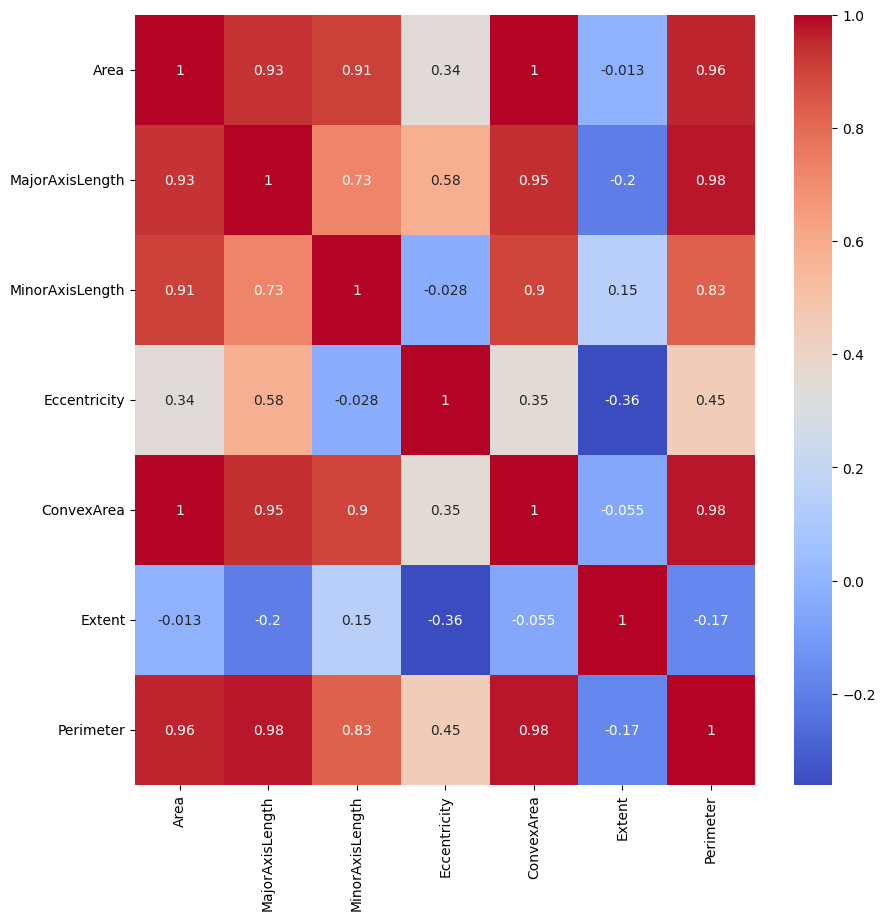

In [ ]:
#Performing data visualisation
#Heatmap
plt.figure(figsize=(10,10))
sns.heatmap(ds.corr(), annot=True, cmap='coolwarm')
plt.show()

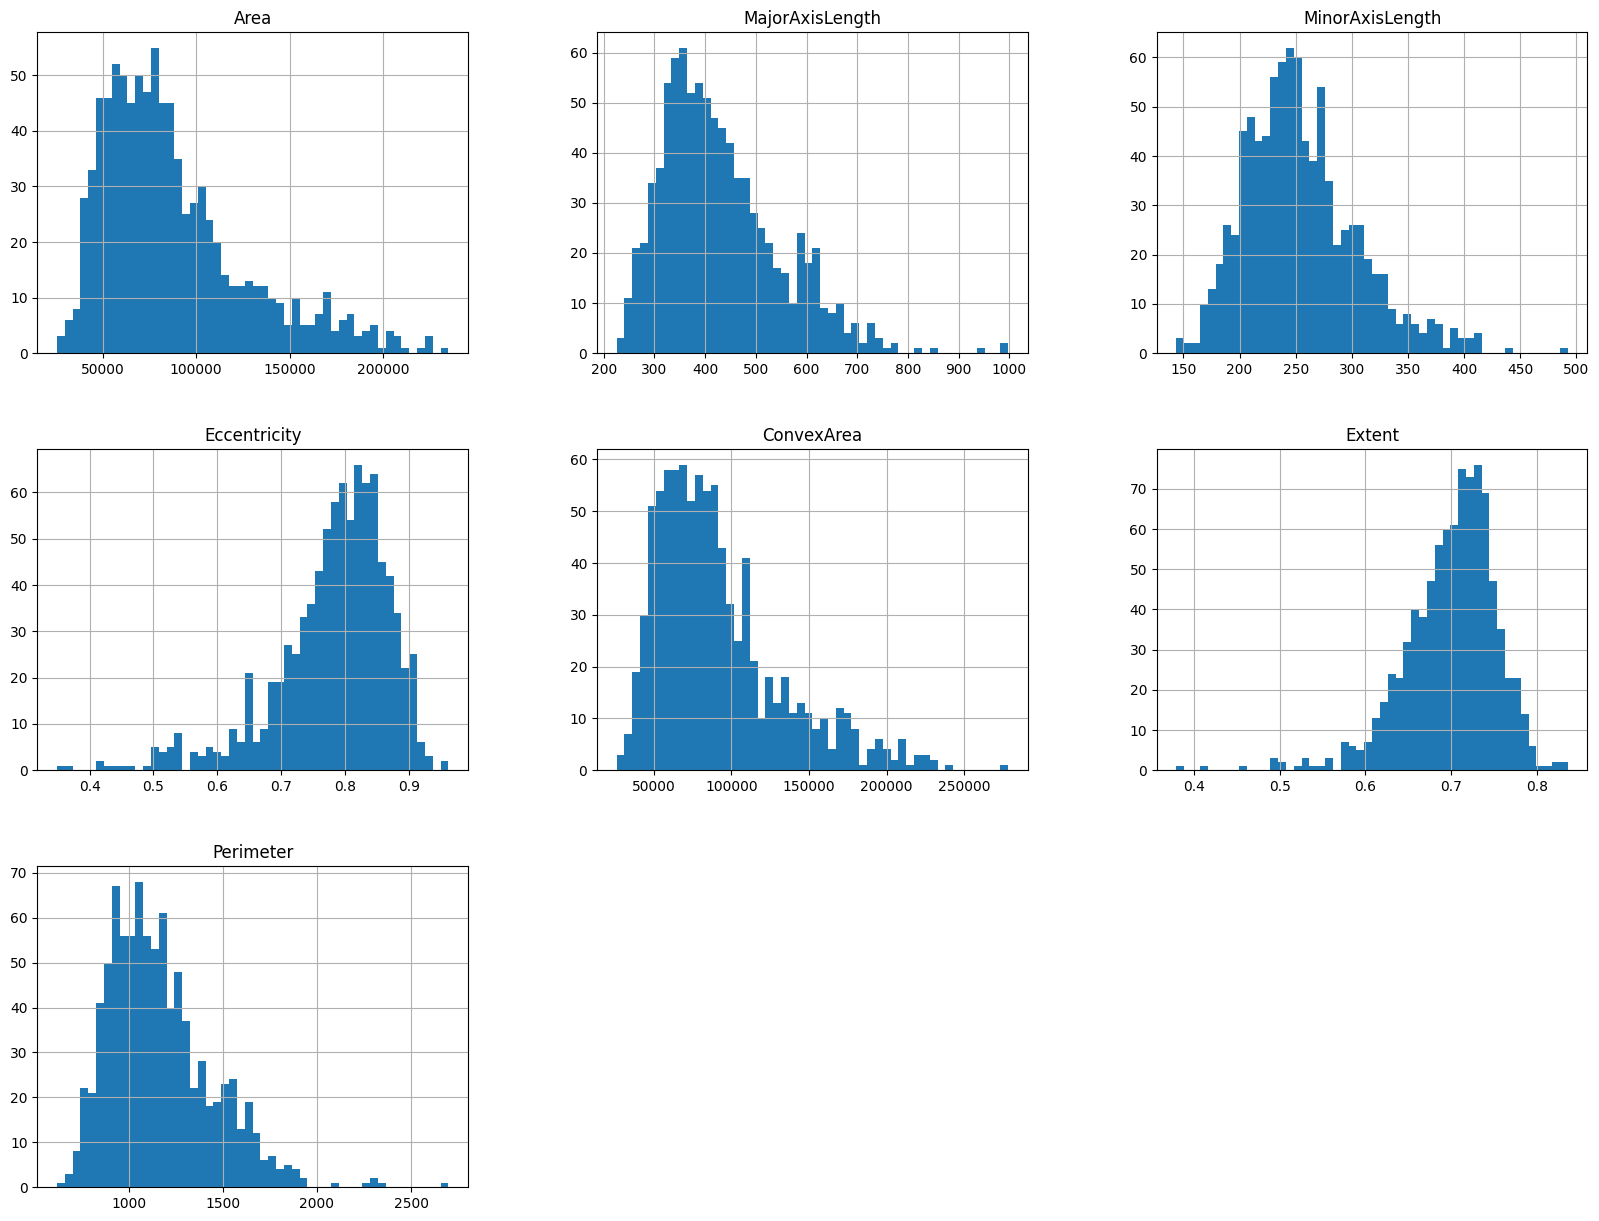

In [ ]:
ds.hist(bins=50,figsize=(20,15))
plt.show()

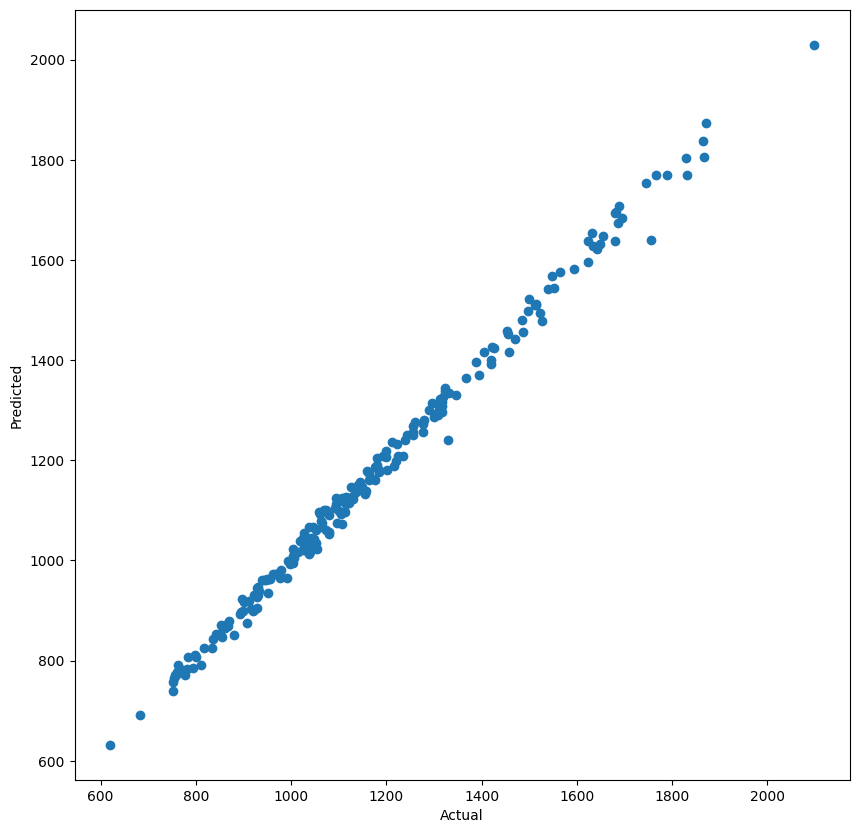

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [ ]:
from collections.abc import ValuesView
#Now perform Eigen Values and  Eigen Vectors
ValuesView, Vectors = np.linalg.eig(ds.cov())
print('Eigen Values : \n', ValuesView)
print('Eigen Vectors : \n', Vectors)

Eigen Values : 
 [3.17690251e+09 6.48407026e+06 3.41164711e+03 5.87172102e+02
 4.59238281e+01 1.56545758e-03 1.78103300e-03]
Eigen Vectors : 
 [[ 6.91197795e-01 -7.22590016e-01 -9.91679463e-03  2.33690378e-03
  -2.33950745e-03 -6.53729696e-06 -1.17428351e-06]
 [ 1.93542937e-03  6.10173518e-03 -5.80009507e-01 -5.16220887e-01
   6.30129625e-01 -6.36426845e-04 -4.90418263e-04]
 [ 7.99821932e-04 -2.42748313e-03  2.13752362e-01  6.49983533e-01
   7.29259089e-01  2.27856987e-03 -8.89159755e-04]
 [ 5.49274320e-07  4.73721490e-06 -1.05401383e-03 -1.66106742e-03
  -1.29958384e-03  9.99603233e-01  2.80680854e-02]
 [ 7.22647225e-01  6.91012292e-01  1.59270484e-02 -5.20901090e-03
   1.48197552e-03  6.39238404e-06  1.81506976e-08]
 [-3.33031368e-08 -9.60230807e-06  3.48305700e-04  7.83562612e-05
   1.13451430e-03 -2.80661727e-02  9.99605360e-01]
 [ 4.71287173e-03  1.79598861e-02 -7.85840730e-01  5.57675571e-01
  -2.66659316e-01 -2.63439244e-04  5.25530517e-04]]


In [ ]:
#Trying Ridge and Lasso regression to reduce the overfitting problem
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
regression = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet()
}

In [ ]:
r2score = {}


In [ ]:

for name, model in regression.items():
  model.fit(X_train, Y_train)
  y_pred = model.predict(X_test)
  print(f'{name} score: {model.score(X_test, Y_test)}')
  print(f'{name} MSE: {mean_squared_error(Y_test, y_pred)}')
  print(f'{name} R2 score: {r2_score(Y_test, y_pred)}')
  r2score[name] = model.score(X_test, Y_test)


LinearRegression score: 0.9949044041113294
LinearRegression MSE: 404.1051607224609
LinearRegression R2 score: 0.9949044041113294
Ridge score: 0.9948500252748625
Ridge MSE: 408.41766291660343
Ridge R2 score: 0.9948500252748625
Lasso score: 0.994495837372738
Lasso MSE: 436.50646003496394
Lasso R2 score: 0.994495837372738
ElasticNet score: 0.9944965968040406
ElasticNet MSE: 436.4462334951619
ElasticNet R2 score: 0.9944965968040406


In [ ]:
r2score

{'LinearRegression': 0.9949044041113294,
 'Ridge': 0.9948500252748625,
 'Lasso': 0.994495837372738,
 'ElasticNet': 0.9944965968040406}

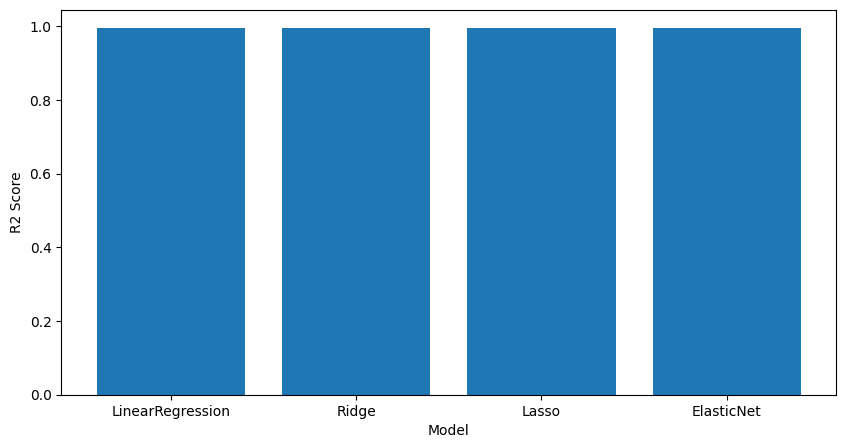

In [ ]:
#Display visualization
#Using Bar plot
plt.figure(figsize=(10,5))
plt.bar(r2score.keys(), r2score.values())
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.show()

In [ ]:
ds.shape

(900, 7)

In [ ]:
ds.corr()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
Area,1.000000,0.932774,0.906650,0.336107,0.995920,-0.013499,0.961352
MajorAxisLength,0.932774,1.000000,0.728030,0.583608,0.945031,-0.203866,0.977978
MinorAxisLength,0.906650,0.728030,1.000000,-0.027683,0.895651,0.145322,0.827417
Eccentricity,0.336107,0.583608,-0.027683,1.000000,0.348210,-0.361061,0.447845
ConvexArea,0.995920,0.945031,0.895651,0.348210,1.000000,-0.054802,0.976612
Extent,-0.013499,-0.203866,0.145322,-0.361061,-0.054802,1.000000,-0.173449
Perimeter,0.961352,0.977978,0.827417,0.447845,0.976612,-0.173449,1.000000
